# STA 141B Assignment 4

Due __Feb 22, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice scraping data from web pages.

## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

In [142]:
# Our usual data science tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp # other science tools
# statsmodels -- "traditional statistical models"
# scikit-learn -- machine learning models
import seaborn as sns
#from plotnine import *

%matplotlib inline

# Web scraping tools
import lxml.html as lx
import requests
import requests_cache

import nltk
import nltk.corpus

# requests_cache.install_cache("../mycache")
requests_cache.install_cache("../mycache2")

In [143]:
def get_article_list(url):
    response = requests.get(url)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)

    # Get all <a> tags inside of <h2> tags with class "headline"
#     links = html.xpath("//h2[contains(@class, 'headline')]/a")
#     links = [tag.attrib.get('href') for tag in links]

    links = html.xpath("//a/@href")
    links = set([link for link in links if 'article' in link])
    
    return list(links)

get_article_list("https://www.sfchronicle.com/business/")

['https://www.sfchronicle.com/news/world/article/Asian-shares-mostly-lower-as-investors-watch-13635858.php',
 'https://www.sfchronicle.com/business/article/SpaceX-will-send-Israel-lander-to-the-moon-13631977.php',
 'https://www.sfchronicle.com/wine/article/Merry-Edwards-Winery-Sonoma-Pinot-Noir-icon-13636722.php',
 'https://www.sfchronicle.com/business/article/Can-California-homes-and-businesses-quit-natural-13626019.php',
 'https://www.sfchronicle.com/realestate/article/What-s-a-piece-of-technology-you-can-t-13620503.php',
 'https://www.sfchronicle.com/business/article/Tesla-s-top-lawyer-departs-other-problems-13638377.php',
 'https://www.sfchronicle.com/business/article/PG-E-says-it-s-still-trying-to-limit-power-13615287.php',
 'https://www.sfchronicle.com/business/article/PG-E-will-not-award-workers-130-million-in-13638337.php',
 'https://www.sfchronicle.com/business/article/Lyft-sets-early-April-for-its-IPO-13634770.php',
 'https://www.sfchronicle.com/realestate/article/15-years-an

In [144]:
get_article_list("https://www.sfchronicle.com/elections/")

['https://www.sfchronicle.com/politics/article/California-lawmakers-make-renewed-push-for-gun-13588976.php',
 'https://www.sfchronicle.com/nation/article/2020-Democratic-contest-will-soon-become-crowded-13533111.php',
 'https://www.sfchronicle.com/news/crime/article/AP-source-Mueller-report-not-expected-next-week-13637596.php',
 'https://www.sfchronicle.com/politics/article/SF-Board-of-Supervisors-new-mash-up-of-members-13382661.php',
 'https://www.sfchronicle.com/business/article/Going-paperless-California-lawmaker-wants-to-13518187.php',
 'https://www.sfchronicle.com/politics/article/California-s-politician-free-redistricting-13415225.php',
 'https://www.sfchronicle.com/politics/article/California-lawmaker-flips-from-Republican-to-13559443.php',
 'https://www.sfchronicle.com/news/article/Biden-s-2020-opening-Dem-field-missing-foreign-13638816.php',
 'https://www.sfchronicle.com/politics/article/CA-Democrats-complete-sweep-of-targeted-GOP-House-13448455.php',
 'https://www.sfchronicle

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

In [145]:
def get_article_data(url):
    response = requests.get(url)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    
    try:
        title = html.xpath("//h1[contains(@class, 'header-title')] | //h1[contains(@class, 'headline entry-title')]")[0].text_content()
    except IndexError:
        try:
            title = html.xpath("//h2[contains(@class, 'headline')]")[0].text_content()
        except:
            title = None
    
    try:
        text_blocks = html.xpath("(//section[contains(@class, 'body')]//p | //div[contains(@class, 'article-body')]//p)/text()[not(ancestor::em)]")
        text = ' '.join([block for block in text_blocks])
    except IndexError:
        text = None
    
    try:
        author = html.xpath("//span[contains(@class, 'header-authors-name')] | //p[contains(@class, 'byline')]/a | //span[contains(@class, 'header-byline')]")[0].text_content()
    except IndexError:
        author = None
    author = ' '.join(author.split()).lstrip('By ')
    if author == '':
        author = None
    
    try:
        date = html.xpath("//time[contains(@itemprop, 'datePublished')]")[0].attrib.get("datetime")
    except IndexError:
        try:
            date = html.xpath("//meta[contains(@name, 'article:published_time')]")[0].attrib.get("content")
        except IndexError:
            date = None
    
    try:
        update = html.xpath("//time[contains(@itemprop, 'dateModified')]")[0].attrib.get("datetime")
    except IndexError:
        try:
            update = html.xpath("//meta[contains(@name, 'article:modified_time')]")[0].attrib.get("content")
        except IndexError:
            update = None
    
    data = {'url': url, 'title': title, 'text': text, 'author': author, 'date': date, 'date_updated': update}
    
    return data

# get_article_data("https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php")
# get_article_data("https://www.sfchronicle.com/bayarea/article/Owner-of-destroyed-Richard-Neutra-house-sues-San-13621201.php")

In [146]:
get_article_data("https://www.sfchronicle.com/politics/article/Kamala-Harris-prosecutor-past-could-be-a-2020-13524773.php")

{'url': 'https://www.sfchronicle.com/politics/article/Kamala-Harris-prosecutor-past-could-be-a-2020-13524773.php',
 'title': 'Kamala Harris in the Senate',
 'text': 'WASHINGTON — Sen. Kamala Harris’ communications director has a note in all capital letters stuck on her office computer: “Show the math.” It’s a quote from her boss — one the senator uses frequently. “There’s, I think, a running joke in the office about certain phrases I use all the time,” the California Democrat said. “This is how I would train lawyers, prosecutors about trial techniques: I’d say, ‘When you’re standing before the jury, in your closing argument ... show them the math.’ Instead of saying, ‘You must find 8,’ show them 2 plus 2 plus 2 plus 2.” The “Kamalism,” as one former staffer called it, is far from the only remnant of her prosecutor past that followed her to Washington. That background has helped define Harris’ time in the Senate — which will draw intensive scrutiny if, as expected, she declares her cand

In [147]:
get_article_data('https://www.sfchronicle.com/visionsf/article/Jose-Qui-onez-s-nonprofit-offers-13618848.php')

{'url': 'https://www.sfchronicle.com/visionsf/article/Jose-Qui-onez-s-nonprofit-offers-13618848.php',
 'title': 'José Quiñonez’s nonprofit offers ‘passport’ to US economy for underprivileged',
 'text': 'By  José Quiñonez, who came from Mexico in 1980 as an undocumented immigrant, founded Mission Asset Fund to help low-income people get affordable loans. José Quiñonez, who came from Mexico in 1980 as an undocumented... After the death of their mother and father, José Quiñonez and his five siblings walked for hours in the dark and crawled through a drainpipe leading from Mexico to California — where they would live with family in San Jose they had never met. It was July 4, 1980. “I saw the fireworks and I thought it was just like a welcoming committee,” said Quiñonez, half-jokingly, at his cramped office at a Mission District nonprofit he started a decade ago to help underprivileged people gain a financial foothold. The idea had its roots in those first years in the U.S. The siblings, ag

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [148]:
business = get_article_list("https://www.sfchronicle.com/business/")
local = get_article_list("https://www.sfchronicle.com/local/")
politics = get_article_list("https://www.sfchronicle.com/elections/")

In [149]:
business = pd.DataFrame([get_article_data(art) for art in business])
local = pd.DataFrame([get_article_data(art) for art in local])
politics = pd.DataFrame([get_article_data(art) for art in politics])

In [150]:
business['category'] = 'business'
local['category'] = 'local'
politics['category'] = 'politics'

df = pd.concat([business, local, politics], ignore_index = True)
df

,author,date,date_updated,text,title,url,category
0,"YURI KAGEYAMA and MATT OTT, AP Business Writer",2019-02-22T12:31:39+00:00,2019-02-22T12:35:07+00:00,TOKYO (AP) — Global shares were mixed Friday a...,Global shares mixed as investors watch trade t...,https://www.sfchronicle.com/news/world/article...,business
1,Chabeli Herrera,2019-02-20T23:24:19+00:00,None,Israel is heading to the moon. And if it’s suc...,SpaceX will send Israel lander to the moon,https://www.sfchronicle.com/business/article/S...,business
2,Esther Mobley,2019-02-22T23:12:44+00:00,2019-02-22T23:13:48+00:00,"Champagne Louis Roederer, the French company f...","Merry Edwards Winery, Sonoma Pinot Noir icon, ...",https://www.sfchronicle.com/wine/article/Merry...,business
3,J.D. Morris,2019-02-19T12:00:00+00:00,2019-02-19T12:00:33+00:00,To meet its aggressive goals for fighting clim...,Can California homes and businesses quit natur...,https://www.sfchronicle.com/business/article/C...,business
4,Sentinel Media Services,2019-02-20T18:16:16+00:00,2019-02-20T18:18:03+00:00,Real estate today moves at the speed of infor...,What’s a piece of technology you can’t imagine...,https://www.sfchronicle.com/realestate/article...,business
5,Neal E. Boudette,2019-02-23T01:40:46+00:00,2019-02-23T01:41:38+00:00,After lurching from crisis to crisis last year...,"Tesla’s top lawyer departs, other problems lin...",https://www.sfchronicle.com/business/article/T...,business
6,J.D. Morris,2019-02-14T04:59:31+00:00,2019-02-14T23:57:55+00:00,While millions more Pacific Gas and Electric C...,PG&E says it’s still trying to limit power shu...,https://www.sfchronicle.com/business/article/P...,business
7,J.D. Morris and Matthias Gafni,2019-02-23T04:33:42+00:00,2019-02-23T04:34:44+00:00,Pacific Gas and Electric Co. will not award an...,PG&E won’t award $130 million in bonuses to wo...,https://www.sfchronicle.com/business/article/P...,business
8,Mike Isaac and Kate Conger,2019-02-21T21:35:35+00:00,None,In a rush to beat its rival Uber to the public...,Lyft sets early April for its IPO,https://www.sfchronicle.com/business/article/L...,business
9,"Anna Marie Erwert , SFGATE",2019-02-21T12:03:33+00:00,2019-02-21T13:18:46+00:00,"In 2001, this Russian Hill home sold for $740,...",15 years and a luxe remodel add $2.755M to Rus...,https://www.sfchronicle.com/realestate/article...,business


In [151]:
df.count()

author          246
date            249
date_updated    234
text            249
title           249
url             249
category        249
dtype: int64

In [159]:
df['text'] = df['text'].str.strip()

In [160]:
df['date'] = pd.to_datetime(df['date'])

In [161]:
df['date_updated'] = pd.to_datetime(df['date_updated'])

In [162]:
df['category'] = df['category'].astype('category')

In [163]:
df.dtypes

author                  object
date            datetime64[ns]
date_updated    datetime64[ns]
text                    object
title                   object
url                     object
category              category
dtype: object

__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

In [234]:
# Split article texts according to category
business_text = df[df['category'] == 'business']['text']
local_text = df[df['category'] == 'local']['text']
politics_text = df[df['category'] == 'politics']['text']

In [310]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords += ['say', 'go', 'get', 'would', 'could', 'also', 'one']

In [282]:
lemmatizer = nltk.WordNetLemmatizer()

from nltk.corpus import wordnet

def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [325]:
def clean_tokenize(corpus, stopwords):
    text = [doc.replace("\'", '').lower() for doc in corpus]
    text = ' '.join([doc for doc in text])
    text = text.replace("san francisco", "sanfrancisco")
    text = text.replace("san jose", "sanjose")
    text = text.replace("pg&e", "pgande")
    text = [w for w in nltk.word_tokenize(text)]
    text = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in nltk.pos_tag(text)]
    text = [w for w in text if w not in stopwords]
    return [w for w in text if w.isalnum()]

In [327]:
business_words = clean_tokenize(business_text, stopwords)
local_words = clean_tokenize(local_text, stopwords)
politics_words = clean_tokenize(politics_text, stopwords)
all_words = clean_tokenize(df['text'], stopwords)

# Get frequency distributions
business_fq = nltk.FreqDist(business_words)
local_fq = nltk.FreqDist(local_words)
politics_fq = nltk.FreqDist(politics_words)
all_fq = nltk.FreqDist(all_words)

In [269]:
set(business_fq.hapaxes()) - (set(local_fq.hapaxes()) | set(politics_fq.hapaxes()))

{'complexity',
 'ambition',
 'criticize',
 'cartoon',
 'exploitation',
 'photo',
 'senka',
 '81',
 'variation',
 'alley',
 'opine',
 'comparable',
 'lockbox',
 'reimagining',
 'ryan',
 '1920s',
 'torres',
 'ken',
 'stunning',
 'bart',
 'simple',
 'restraint',
 'stopped',
 'furnishing',
 'expeditious',
 'emphasis',
 'victim',
 'annual',
 'official',
 'restaurants',
 'abound',
 'relevant',
 'ramos',
 'rebecca',
 'compel',
 'trader',
 'magnetic',
 'restructuring',
 'scrubbing',
 'spaceflight',
 'transferring',
 'dormant',
 'steeped',
 'compensation',
 'constellation',
 'envoy',
 'golden',
 'adpocalypse',
 'night',
 'deleted',
 'painted',
 'locate',
 'frédéric',
 'grapevine',
 'wet',
 'renaissance',
 'elect',
 'cabinetry',
 'edison',
 'teeter',
 'sidestep',
 '350',
 'llama',
 'ellias',
 'yehud',
 'environmentally',
 'moment',
 'integrity',
 'ninja',
 'inn',
 'yield',
 'nice',
 'overnight',
 'amsterdam',
 'silver',
 'allegation',
 'anna',
 'vintner',
 'damari',
 'pmis',
 'payload',
 'backsp

In [270]:
set(politics_fq.hapaxes()) - (set(business_fq.hapaxes()) | set(local_fq.hapaxes()))

{'miscalculation',
 'summarize',
 'terner',
 'cattle',
 'surrender',
 'jeb',
 'denounce',
 'unfocused',
 'cow',
 'phase',
 'considers',
 'ebay',
 'perlmutter',
 'talented',
 'bin',
 'youngest',
 '283',
 'unmistakable',
 'reflective',
 'oprah',
 'pregnant',
 'filemon',
 'mentzer',
 'stumble',
 'emmer',
 'hi',
 'ditch',
 'underwent',
 'mara',
 'overgrown',
 'tehachapi',
 'snowball',
 'crawl',
 'intrusive',
 'merkley',
 'clobber',
 'kasky',
 'categorize',
 'crystallize',
 '214',
 'knee',
 'seldom',
 'lower',
 'utilize',
 'emergence',
 'su',
 'toil',
 'jameson',
 'nuru',
 'govs',
 'ab125',
 'whichever',
 'sweatshop',
 'superficial',
 'whittier',
 'weakening',
 'salty',
 'mired',
 'incumbency',
 'powered',
 'unpredictability',
 'royce',
 'criminalize',
 'napolitano',
 'unsheltered',
 'lottery',
 'donates',
 'clown',
 'firmly',
 'degrading',
 'naive',
 '1789',
 'cargo',
 'ritual',
 'lookout',
 'tide',
 'opposes',
 'broom',
 'condone',
 'appreciated',
 'sadly',
 'accomplished',
 'sting',
 'je

In [271]:
set(politics_fq.hapaxes()) & set(business_fq.hapaxes()) & set(local_fq.hapaxes())

{'140',
 '1972',
 '2000s',
 'accommodate',
 'architect',
 'bash',
 'blueprint',
 'bowl',
 'coin',
 'continued',
 'dark',
 'doorway',
 'efficiently',
 'flesh',
 'foster',
 'frugal',
 'hastings',
 'hyde',
 'improved',
 'jonathan',
 'landscape',
 'nook',
 'partially',
 'passion',
 'pier',
 'preliminary',
 'preparation',
 'primarily',
 'procedure',
 'purge',
 'quicker',
 'rebound',
 'reporting',
 'robin',
 'ruin',
 'scheduled',
 'scholarship',
 'shrink',
 'shuttle',
 'surprised',
 'traditionally',
 'undertake',
 'violet'}

In [315]:
%matplotlib inline

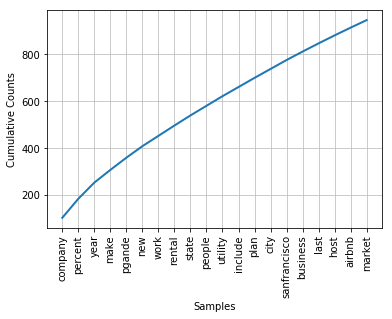

In [321]:
business_fq.plot(20, cumulative = True)

Somewhat unsurprisingly, The Chronicle mentions the word 'company' with the highest frequency in the Biz+Tech category. PG&E also makes a frequent appearance, along with Airbnb (and some associated words, such as 'utility', 'host', and 'rental'). 'Business' and 'market' are also frequently mentioned.

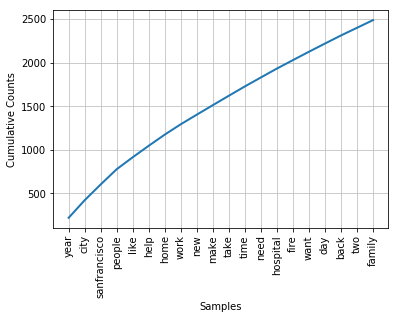

In [322]:
local_fq.plot(20, cumulative = True)

In the Local category, The Chronicle frequently includes terms like 'people', 'help', 'home', 'work', 'hospital', 'fire', and 'family'.

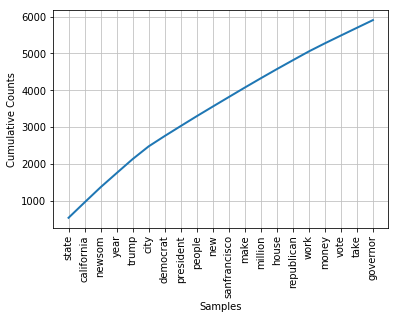

In [320]:
politics_fq.plot(20, cumulative = True)

 In the Politics category, The Chronicle frequently mentions 'Newsom', 'Trump', 'democrat', 'president', 'republican', 'money', and 'vote'. This shows that they have recently been covering stories about policy and elections (or perhaps, the effects of money on politics!).

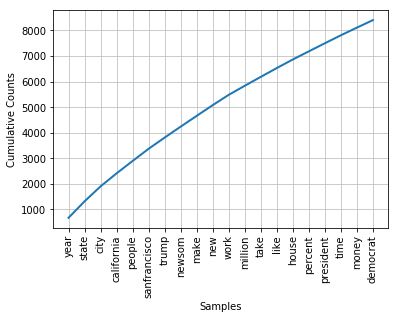

In [328]:
all_fq.plot(20, cumulative = True)

The above chart shows the top 20 most used terms across all three of the 